In [56]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt 


In [57]:
df = pd.read_csv("D:/Machine Learning/Dataset/insurance.csv")

In [58]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [59]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [60]:
df.shape

(1338, 7)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [63]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [64]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


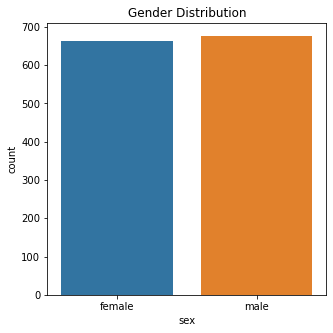

In [65]:
plt.figure(figsize=(5,5))
sn.countplot(x='sex',data=df)
plt.title('Gender Distribution')
plt.show()

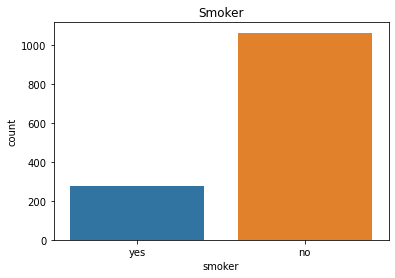

In [66]:
sn.countplot(x='smoker',data=df)
plt.title('Smoker')
plt.show()

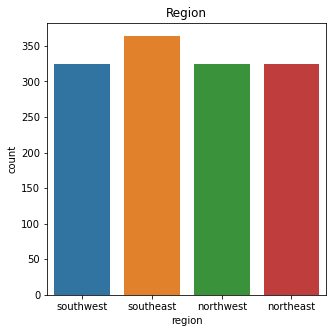

In [67]:
plt.figure(figsize=(5,5))
sn.countplot(x='region',data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Region vs Expenses')

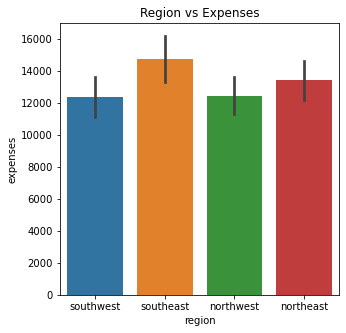

In [72]:
plt.figure(figsize=(5,5))
sn.barplot(x='region',y='expenses',data=df)
plt.title('Region vs Expenses')


Text(0.5, 1.0, 'Smoker vs Expenses')

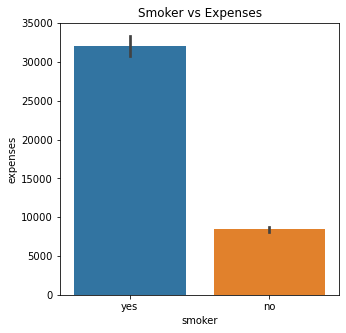

In [73]:
plt.figure(figsize=(5,5))
sn.barplot(x='smoker',y='expenses',data=df)
plt.title('Smoker vs Expenses')

Text(0.5, 1.0, 'Sex vs Expenses')

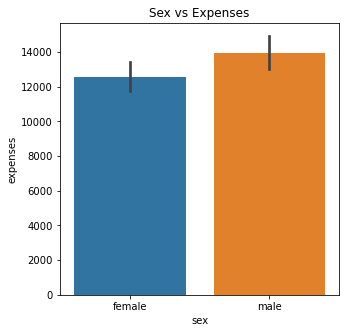

In [74]:
plt.figure(figsize=(5,5))
sn.barplot(x='sex',y='expenses',data=df)
plt.title('Sex vs Expenses')

Text(0.5, 1.0, 'Expenses for smoker')

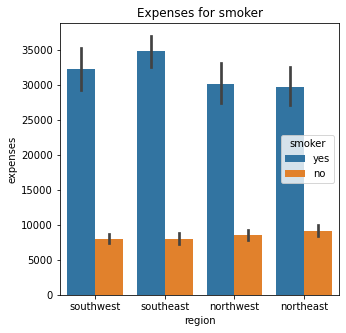

In [75]:
plt.figure(figsize=(5,5))
sn.barplot(x='region',y='expenses',hue='smoker',data=df)
plt.title('Expenses for smoker')

Text(0.5, 1.0, 'Expenses for smoker')

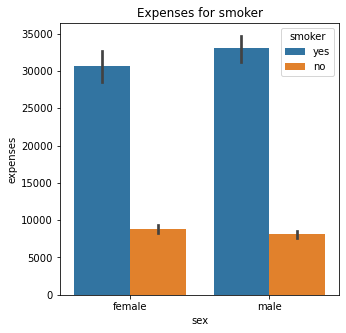

In [76]:
plt.figure(figsize=(5,5))
sn.barplot(x='sex',y='expenses',hue='smoker',data=df)
plt.title('Expenses for smoker')

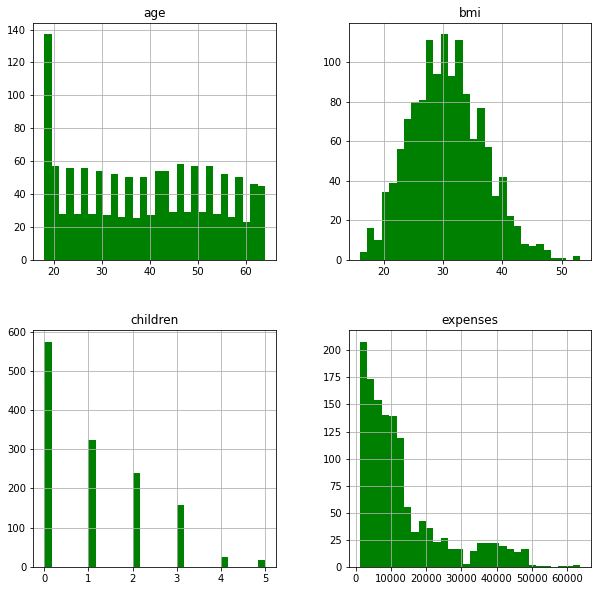

In [79]:
df[['age','bmi','children','expenses']].hist(bins=30,figsize=(10,10),color='green')
plt.show()

In [80]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [81]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [82]:
df['sex']  = df['sex'].apply({'male':0,'female':1}.get)
df['smoker']  = df['smoker'].apply({'yes':1,'no':0}.get)
df['region']  = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [83]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,3,21984.47
4,32,0,28.9,0,0,3,3866.86


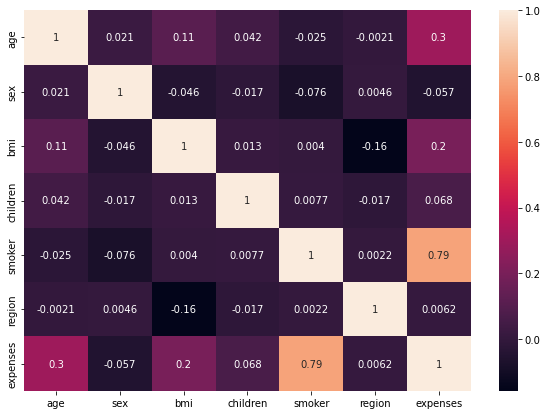

In [84]:
plt.figure(figsize=(10,7))
sn.heatmap(df.corr(), annot = True)
plt.show()

In [112]:
X = df.drop(['expenses'],axis=1)
y = df.expenses

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=30)

In [115]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((936, 6), (402, 6), (936,), (402,))

In [116]:
Lr = LinearRegression()

In [117]:
Lr.fit(X_train,y_train)
pred = Lr.predict(X_test)

In [118]:
from sklearn.metrics import r2_score

In [119]:
r2 = r2_score(y_test,pred)
r2

0.7631627791214296

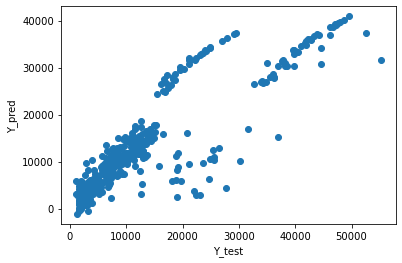

In [120]:
plt.scatter(y_test,pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [121]:
data = { 'age':55,'sex':0,'bmi':20 ,'children':2 ,'smoker':0 , 'region':3}
index = [0]
pre = pd.DataFrame(data , index)
pre

,age,sex,bmi,children,smoker,region
0,55,0,20,2,0,3


In [122]:
cost = Lr.predict(pre)
print(" The medical insurance Premium of new customer is: ",cost)

 The medical insurance Premium of new customer is:  [9699.24465236]


In [123]:
import joblib

In [124]:
joblib.dump(Lr,'model_Lr')

['model_Lr']

In [125]:
model = joblib.load('model_Lr')

In [126]:
model.predict(pre)

array([9699.24465236])

In [127]:
from tkinter import *

In [104]:
import joblib

In [130]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())

    model = joblib.load('model_Lr')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text = "Insurance Cost").grid(row = 7)
    Label(master, text=result).grid(row = 8)
    
        






master = Tk()
master.title("Insurance Cost Prediction")
label = Label(master,text= "Insurance Cost Prediction", bg = "black", fg = "white").grid(row=0,columnspan=2)

Label(master,text= "Enter the Age").grid(row=1)
Label(master,text= "Male or Female [0/1]").grid(row=2)
Label(master,text= "Enter Your BMI Value ").grid(row=3)
Label(master,text= "Enter Number Of Children").grid(row=4)
Label(master,text= "Smoker Yes or No [1/0]").grid(row=5)
Label(master,text= "Region [1-4]").grid(row=6)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)




           













Button(master,text="Predict",command=show_entry).grid()


mainloop()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
